# Código.

In [64]:
# Importamos las librerias y dependencias necesarias.
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx
import matplotlib.pyplot as plt

#### Los datos están almacenados en un archivo .csv, en donde se especifica cada relación que existe en el grupo que se esta analizando.

In [65]:
datos = pd.read_csv('sexto.csv', index_col=None)

In [66]:
datos.head(10)

,source,target
0,Alexis,Ceci
1,Alexis,Vianey
2,Alexis,Mago
3,Aldahir,David
4,Aldahir,Israel
5,Aldahir,Ramon
6,Aldahir,Naye
7,Ceci,Alexis
8,Ceci,Vianey
9,Ceci,Aldahir


In [67]:
relationship_df = pd.DataFrame(datos)

In [68]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,Alexis,Ceci
1,Alexis,Vianey
2,Alexis,Mago
3,Aldahir,David
4,Aldahir,Israel
5,Aldahir,Ramon
6,Aldahir,Naye
7,Ceci,Alexis
8,Ceci,Vianey
9,Ceci,Aldahir


In [69]:
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,Alexis,Ceci
1,Alexis,Vianey
2,Alexis,Mago
3,Aldahir,David
4,Aldahir,Israel
5,Aldahir,Ramon
6,Aldahir,Naye
7,Alexis,Ceci
8,Ceci,Vianey
9,Aldahir,Ceci


In [70]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [71]:
relationship_df.head(20)

,source,target,value
0,Alexis,Ceci,2
1,Alexis,Vianey,2
2,Alexis,Mago,2
3,Aldahir,David,2
4,Aldahir,Israel,2
5,Aldahir,Ramon,2
6,Aldahir,Naye,2
7,Ceci,Vianey,2
8,Aldahir,Ceci,1
9,David,Israel,2


# Red social (Grafo)

In [72]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

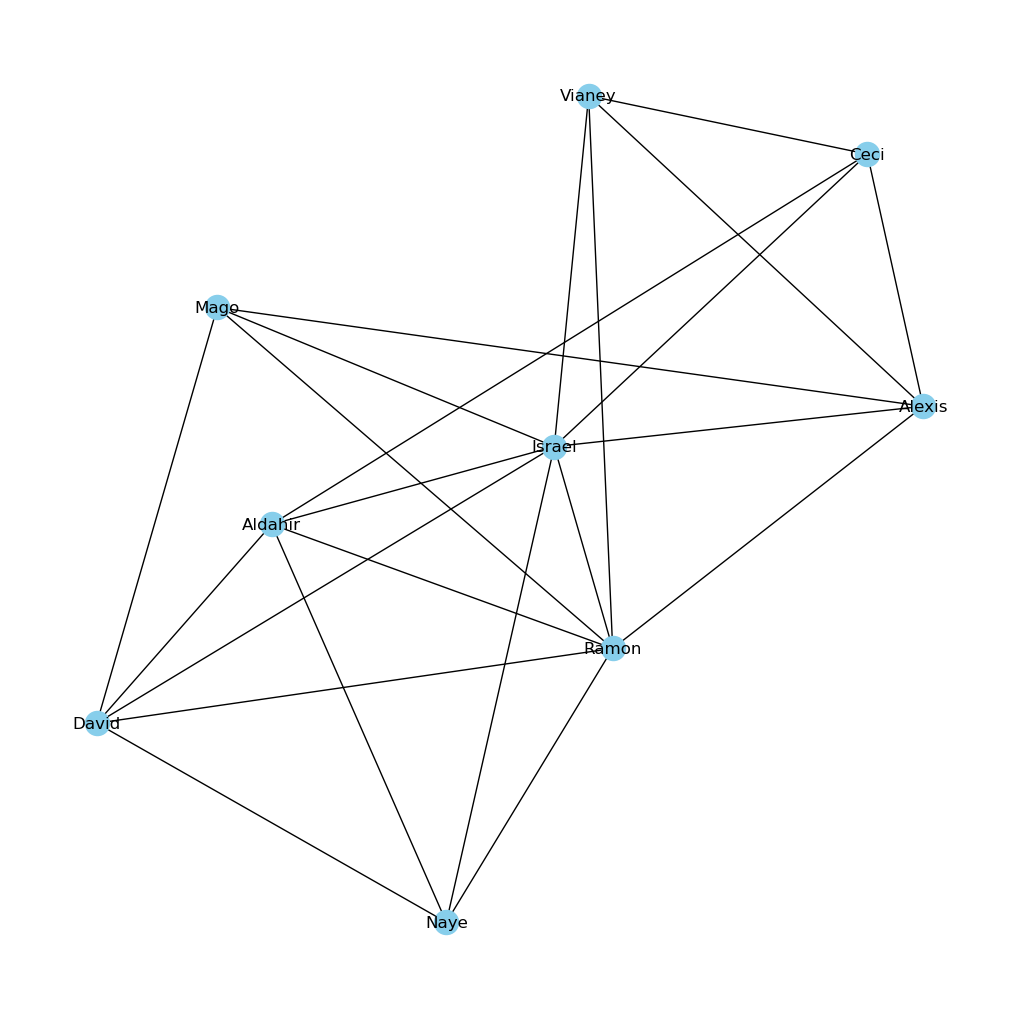

In [73]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [74]:
from pyvis.network import Network
net = Network(notebook = True, width="1366px", height="768px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("r6.html")


r6.html


# Visualizar comunidades dentro de la red

In [75]:
# Importamos librerias necesarias para mostrar la comunidades en una red
import community as community_louvain
import community.community_louvain as community_louvain

In [76]:
communities = community_louvain.best_partition(G)

In [77]:
communities

{'Alexis': 0,
 'Ceci': 0,
 'Vianey': 0,
 'Mago': 0,
 'Aldahir': 1,
 'David': 1,
 'Israel': 0,
 'Ramon': 1,
 'Naye': 1}

In [78]:
nx.set_node_attributes(G, communities, 'group')

In [79]:
com_net = Network(notebook = True, width="1366px", height="768px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("r6_communities.html")

r6_communities.html
